## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file


## Import Statements

In [2]:
import pandas as pd 

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [32]:
df = pd.read_csv('QueryResults.csv', header=0, names=['Date', 'Tag', 'Posts'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [33]:
df.head()

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [34]:
df.tail()

,Date,Tag,Posts
2337,2022-08-01 00:00:00,php,3943
2338,2022-08-01 00:00:00,python,22633
2339,2022-08-01 00:00:00,r,4438
2340,2022-08-01 00:00:00,ruby,481
2341,2022-08-01 00:00:00,swift,1784


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [35]:
df.shape

(2342, 3)

**Challenge**: Count the number of entries in each column of the dataframe

Let's start with looking at the number of posts per language.

In [54]:
sort_by_posts = df.groupby('Tag').sum().sort_values(by='Posts', ascending=False)

In [49]:
sort_by_posts

,Posts
Tag,
javascript,2413191
python,2007757
java,1859995
c#,1554177
php,1442223
c++,773760
r,460858
c,383941
swift,317112


Let's add our index for clarity.

In [52]:
sort_by_posts = sort_by_posts.reset_index()

In [53]:
sort_by_posts

,Tag,Posts
0,javascript,2413191
1,python,2007757
2,java,1859995
3,c#,1554177
4,php,1442223
5,c++,773760
6,r,460858
7,c,383941
8,swift,317112
9,ruby,225326


We can see that Javascript is easily the most popular language as measured by number of posts. 

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


Since some languages are older than others(e.g. C vs Swift), we should take a look at how many months of data exist per language to add context to the number of posts as a popularity guage. Simply put, popularity by posts will favor languages that have been around longer. 

In [132]:
# Find number of months of data per language

num_months_per_language = {}
for lang_name in df['Tag'].unique():
    num_months = str(df[df['Tag']==lang_name].shape[0])
    num_months_per_language[lang_name] = num_months
    

              

In [142]:

num_months_per_language_df = pd.Series(num_months_per_language, name='Number Months by Language')

In [143]:
num_months_per_language_df

c#            170
assembly      169
c             169
c++           169
delphi        169
java          169
javascript    169
perl          169
php           169
python        169
ruby          169
r             167
swift         161
go            154
Name: Number Months by Language, dtype: object

We can see that `go` has the least number of months. Probably due to its relatively young age--2007. 

## Data Cleaning

Let's fix the date format to make it more readable.

In [149]:
# Convert Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [151]:
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



Let's have a look at our new dataframe

In [153]:
df.shape


(2342, 3)

In [156]:
df.columns

Index(['Date', 'Tag', 'Posts'], dtype='object')

Let's look at the number of entries per programming language.

In [165]:
# Find number of entries per programming language
entries_by_language = df.groupby('Tag').sum().sort_values(by='Posts', ascending=False)

In [166]:
entries_by_language

,Posts
Tag,
javascript,2413191
python,2007757
java,1859995
c#,1554177
php,1442223
c++,773760
r,460858
c,383941
swift,317112


We can see that `javascript`, `python` and `java` are the top 3 languages on stackoverflow.

## Data Visualisaton with with Matplotlib


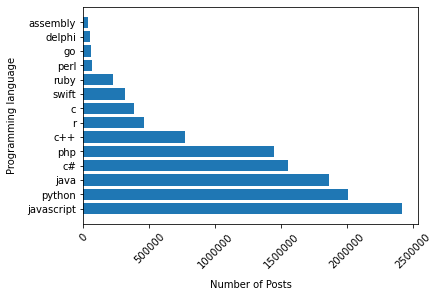

In [300]:
# horiz_chart = entries_by_language.plot.barh()
# # Remove scientific notation
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.xlabel(xlabel='Number of Posts', labelpad=10)
plt.ylabel(ylabel='Programming language', labelpad=10)
ax.barh(y=entries_by_language.index, width=entries_by_language['Posts'])
plt.show()

It's here we can see `javascript` is easily the most popular langauage.

<h2>Visualizing the Popularity of Javascript Over Time</h2>

In [273]:
reshaped_df = df.pivot(index='Date', columns='Tag', values='Posts').dropna()

In [274]:
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2009-11-01,82.0,959.0,4680.0,1749.0,274.0,65.0,2759.0,2231.0,322.0,2684.0,1553.0,94.0,654.0,3.0
2009-12-01,62.0,850.0,4486.0,1653.0,282.0,11.0,2686.0,2306.0,261.0,2824.0,1589.0,80.0,573.0,1.0
2010-02-01,69.0,1034.0,5092.0,2276.0,283.0,7.0,3576.0,2641.0,347.0,3164.0,1861.0,122.0,688.0,2.0
2010-03-01,123.0,1114.0,6034.0,2435.0,317.0,8.0,4441.0,2989.0,392.0,3743.0,2073.0,139.0,695.0,1.0
2010-04-01,124.0,1181.0,5776.0,2489.0,271.0,10.0,3882.0,3009.0,364.0,3637.0,1811.0,160.0,752.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,266.0,1864.0,5928.0,3844.0,122.0,756.0,7815.0,15944.0,100.0,3803.0,23535.0,4765.0,492.0,1769.0
2022-05-01,287.0,1912.0,6277.0,3880.0,129.0,676.0,7848.0,16065.0,94.0,4017.0,23145.0,4833.0,501.0,1755.0
2022-06-01,247.0,1666.0,6109.0,3399.0,125.0,742.0,7053.0,15244.0,125.0,3853.0,22309.0,4413.0,481.0,1794.0


# Javascript over time
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df['javascript'])
plt.plot(reshaped_df.index, reshaped_df['python'])
plt.xlabel('Date', fontsize=14, labelpad=14)
plt.ylabel('Year', fontsize=14, labelpad=14)

# Python


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 